In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import seaborn as sns
import statsmodels.formula.api as smf
import scikit_posthocs as sp
import seaborn as sns
import itertools
from matplotlib.backends.backend_pdf import PdfPages


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import BoundaryNorm, ListedColormap

In [ ]:
# columns = ['noun', 'adj', 'propn', 'adv', 'intj', 'cconj', 'sconj', 'adp', 'det', 'num', 'punct', 'symbol', 'pron', 'abbr', 'nominals', 'TTR', 'avg_word_len', 'avr_sent_len', 'hapax_legomena', 'pron/noun_ratio', 'see_pron', 'see_det', '1st_pron', '2nd_pron', '3rd_pron', 'nominalisation', 'active_voice', 'passive_voice', '1st_prs_verb', '2nd_prs_verb', '3rd_prs_verb', 'core_verb', 'verbtype_ratio', 'da_inf', 'inf_verb', 'finite_verb', 'gerund', 'supine', 'verb_particle', 'discourse', 'pres_tense', 'past_tense', 'ind_mood', 'cond_mood', 'imp_mood', 'quot_mood', 'neg_polarity', 'nom_case', 'gen_case', 'part_case', 'ill_case', 'ine_case', 'ela_case', 'alla_case', 'ade_case', 'abl_case', 'tra_case', 'ter_case', 'ess_case', 'abe_case', 'com_case', 'nsubj', 'nsubj_cop', 'modal', 'acl:relc', 'csubj', 'csubj_cop', 'obj', 'ccomp', 'xcomp', 'obl', 'nmod', 'appos', 'nummod', 'amod', 'advcl', 'voc', 'cop', 'conj', 'cc', 'yneemid']
# columns = ['noun', 'adj', 'propn', 'adv', 'intj', 'cconj', 'sconj', 'adp', 'det', 'num', 'punct', 'symbol', 'pron', 'abbr', 'nominals', 'TTR', 'avg_word_len', 'avr_sent_len', 'hapax_legomena', 'pron/noun_ratio', 'see_pron', 'see_det', '1st_pron', '2nd_pron', '3rd_pron', 'nominalisation', 'mine_derivation', 'active_voice', 'passive_voice', '1st_prs_verb', '2nd_prs_verb', '3rd_prs_verb', 'core_verb', 'verbtype_ratio', 'da_inf', 'inf_verb', 'finite_verb', 'gerund', 'supine', 'verb_particle', 'discourse', 'pres_tense', 'past_tense', 'ind_mood', 'cond_mood', 'imp_mood', 'quot_mood', 'neg_polarity', 'nom_case', 'gen_case', 'part_case', 'ill_case', 'ine_case', 'ela_case', 'alla_case', 'ade_case', 'abl_case', 'tra_case', 'ter_case', 'ess_case', 'abe_case', 'com_case', 'nsubj', 'nsubj_cop', 'modal', 'acl:relc', 'csubj', 'csubj_cop', 'obj', 'ccomp', 'xcomp', 'obl', 'nmod', 'appos', 'nummod', 'amod', 'advcl', 'voc', 'cop', 'conj', 'cc', 'yneemid']
columns = ['noun', 'adj', 'propn', 'adv', 'intj', 'cconj', 'sconj', 'adp', 'det', 'num', 'punct', 'symbol', 'pron', 'abbr', 'nominals', 'TTR', 'avg_word_len', 'avr_sent_len', 'hapax_legomena', 'pron/noun_ratio', 'see_pron', 'see_det', '1st_pron_sg', '2nd_pron_sg', '3rd_pron_sg','1st_pron_pl', '2nd_pron_pl', '3rd_pron_pl', 'nominalisation', 'mine_derivation', 'active_voice', 'passive_voice', '1st_prs_verb', '2nd_prs_verb', '3rd_prs_verb', 'core_verb', 'verbtype_ratio', 'da_inf', 'inf_verb', 'finite_verb', 'gerund', 'supine', 'verb_particle', 'discourse', 'pres_tense', 'past_tense', 'ind_mood', 'cond_mood', 'imp_mood', 'quot_mood', 'neg_polarity', 'nom_case', 'gen_case', 'part_case', 'ill_case', 'ine_case', 'ela_case', 'alla_case', 'ade_case', 'abl_case', 'tra_case', 'ter_case', 'ess_case', 'abe_case', 'com_case', 'nsubj', 'nsubj_cop', 'modal', 'acl:relc', 'csubj', 'csubj_cop', 'obj', 'ccomp', 'xcomp', 'obl', 'nmod', 'appos', 'nummod', 'amod', 'advcl', 'voc', 'cop', 'conj', 'cc', 'yneemid']


def get_data(f):
    ls = []
    with open(f, 'r') as fid:
        reader = csv.DictReader(fid, delimiter=';')
        data = [line for line in reader]
        
    return data


### FUNKTSIOONIDE SEKTSIOON

In [ ]:
def create_array(data):
    # KW sisendi saamiseks on vaja iga rea (=faili) tunnuste väärtused ehk
    # [[tunnus11, tunnus12,.., tunnus1N], [tunnus21, tunnus22,.., tunnus2N], ..]
    d = [list(line.items()) for line in data]
    arrays = []
    for f in d:
        arrays.append([element[1] for element in f[1:]])
    return np.array(arrays)

In [ ]:
def calculate_hb(rank):
    # holm-bonferroni meetodil p väärtuse korrigeerimine, tavalaks on 0.05, aga siin oleme liberaalsed ja panime 0.1
    adjusted_p = 0.1 / (86 - rank + 1) # enne 1 prs pron sg ja pl eraldamist oli tunnuseid 83, seega nende eristamine annab 86
    return adjusted_p

In [ ]:
def get_relevant_features(f, p):
    # tagastab listide listi, kus igas listis on [tunnus, järjekorra nr, KW p, korrigeeritud p, saatus]
    features = [[feature, round(p, 5), f] for feature, f, p in zip(columns, f.tolist(), p.tolist())]       
    H_statistics = [feature[2] for feature in features]
    p_values = [feature[1] for feature in features]
    ranks = stats.rankdata(p_values)
    features = [feature[0] for feature in features]
    m = [s for s in zip(features, p_values, H_statistics, ranks)]
    positive_features = [] 
    for el in m:
        kW_p = el[1]
        adjusted_p = calculate_hb(el[3])
        if adjusted_p > kW_p:
            state = 'YES'
        else:
            state = 'NO'
        positive_features.append([el[0], el[3], el[2], kW_p, adjusted_p, state])

    return positive_features  

In [ ]:
def calculate_dunn_test2(feature, strong_pd, weak_pd, not_pres_pd):
    data = [strong_pd[feature], weak_pd[feature], notpres_pd[feature]]
    df = pd.DataFrame(data).transpose()

    # gruppide määramine ehk tugev/mõõdukas; nõrk; not_present
    group1 = df.iloc[:, 0].dropna()
    group2 = df.iloc[:, 1].dropna()
    group3 = df.iloc[:, 2].dropna()
    
    dunn = sp.posthoc_dunn([group1, group2, group3], p_adjust='holm')
#         dunn = sp.posthoc_dunn([group1, group2, group3])

    return feature.upper(), dunn


In [ ]:
def generate_df(strong_array, weak_array, notpres_array):
    # Kruskal Wallise väljund
    f_statistic, p_value = stats.kruskal(strong_array, weak_array, notpres_array)
    feature_data = get_relevant_features(f_statistic, p_value)

    return feature_data, pd.DataFrame(feature_data, columns =['feature', 'rank', 'H statistic', 'KW p', 'adjusted p', 'state'])

    

In [ ]:
def display_posthoc_results(feats, strong, weak, notpres):
    """sisend: tunnused, tugev-mõõdukas, nõrk, puudu dataframe'id.
    siin funktsioonis kasutatakse calculate_dunn_test2 funktsiooni, kus siis tunnus tunnuse haaval vaadatakse konkreetselt ühe tunnuse 
    mõõtmisi kolmes grupis ja arvutatakse, milliste gruppide vahel on erinevusi.
    väljund: list -> tugev-mõõdukas, tugev-puudu, nõrk-puudu grupid per tunnus (kui relevantne tunnuse p on dunni testis <=0.05) 
    """
    
    strong_w = []
    strong_not = []
    weak_not = []
    for feat in feats:
        out = calculate_dunn_test2(feat, strong, weak, notpres)
        print(f'\n{out[0]}\n{out[1]}')
        print('Kui p>0.05, siis need jäetakse välja!\n')
        strong_weak = [out[1].iloc[1, 0], 'tugev/mõõdukas vs nõrk']
        strong_notpres = [out[1].iloc[2, 0], 'tugev/mõõdukas vs puudu']
        weak_notpres = [out[1].iloc[2, 1], 'nõrk vs puudu']
        for score in [strong_weak, strong_notpres, weak_notpres]:
            if score[0] < 0.05:
                if score[1] == 'tugev/mõõdukas vs nõrk':
                    print('GRUPP 1 (tugev/mõõdukas vs nõrk)')
                    print(f'{feat}, {round(score[0], 10)} \n')
                    strong_w.append([feat, round(score[0], 10)])
                    
                if score[1] == 'tugev/mõõdukas vs puudu':
                    print('GRUPP 2 (tugev/mõõdukas vs MITTEEKSISTEERIV)')
                    print(f'{feat}, {round(score[0], 10)} \n')
                    strong_not.append([feat, round(score[0], 10)])
                if score[1] == 'nõrk vs puudu':
                    print('GRUPP 3 (nõrk vs MITTEEKSISTEERIV)')
                    print(f'{feat}, {round(score[0], 10)} \n')
                    weak_not.append([feat, round(score[0], 10)])
                print(f'TUGEV/MÕÕDUKAS -> mediaan/keskmine: {round(strong[feat].median(), 3)}; {round(strong[feat].mean(), 3)}')
                print(f'NÕRK -> mediaan/keskmine: {round(weak[feat].median(), 3)}; {round(weak[feat].mean(), 3)}')
                print(f'MITTEEKSISTEERIV -> mediaan/keskmine: {round(notpres[feat].median(), 3)}; {round(notpres[feat].mean(), 3)}')


                # print(f'{feat.upper()} =>\n {score[1]}, {round(score[0], 4)}')
            print('================')
    return strong_w, strong_not, weak_not

### INSTRUEERIVUS

In [ ]:
f1 = 'dimensioonide_grupid/inst/inst_strong.csv'
f2 = 'dimensioonide_grupid/inst/inst_weak.csv'
f3 = 'dimensioonide_grupid/inst/inst_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)


print(f'"tugev/mõõdukas" kokku -> {len(strong)}')
print(f'"nõrk" kokku -> {len(weak)}')
print(f'"puudu" kokku -> {len(notpres)}')


feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

In [ ]:
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

for r in relevant_feats:
    print(r)

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### ABSTRAKTSUS

In [ ]:
f1 = 'dimensioonide_grupid/abs/abs_strong.csv'
f2 = 'dimensioonide_grupid/abs/abs_weak.csv'
f3 = 'dimensioonide_grupid/abs/abs_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)

print(f'"tugev/mõõdukas" kokku -> {len(strong)}')
print(f'"nõrk" kokku -> {len(weak)}')
print(f'"puudu" kokku -> {len(notpres)}')

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

print(relevant_feats)

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### AFEKTIIVSUS

In [ ]:
f1 = 'dimensioonide_grupid/afek/afek_strong.csv'
f2 = 'dimensioonide_grupid/afek/afek_weak.csv'
f3 = 'dimensioonide_grupid/afek/afek_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)


print(f'"tugev/mõõdukas" kokku -> {len(strong)}')
print(f'"nõrk" kokku -> {len(weak)}')
print(f'"puudu" kokku -> {len(notpres)}')

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)


relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']
print(relevant_feats)

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')


res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### AEG

In [ ]:
f1 = 'dimensioonide_grupid/aeg/aeg_strong.csv'
f2 = 'dimensioonide_grupid/aeg/aeg_weak.csv'
f3 = 'dimensioonide_grupid/aeg/aeg_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)

print(len(strong))
print(len(weak))
print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

print(relevant_feats)

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### ARGUMENTATIIVSUS

In [ ]:
f1 = 'dimensioonide_grupid/arg/arg_strong.csv'
f2 = 'dimensioonide_grupid/arg/arg_weak.csv'
f3 = 'dimensioonide_grupid/arg/arg_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)


# print(len(strong))
# print(len(weak))
# print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

print(relevant_feats)

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### FORMAALSUS

In [ ]:
f1 = 'dimensioonide_grupid/form/form_strong.csv'
f2 = 'dimensioonide_grupid/form/form_weak.csv'
f3 = 'dimensioonide_grupid/form/form_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)

print(len(strong))
print(len(weak))
print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']
print(relevant_feats)


strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### IMPERSONAALSUS

In [ ]:
f1 = 'dimensioonide_grupid/imp/imp_strong.csv'
f2 = 'dimensioonide_grupid/imp/imp_weak.csv'
f3 = 'dimensioonide_grupid/imp/imp_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)


print(len(strong))
print(len(weak))
print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']
print(relevant_feats)

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### INFOTIHEDUS

In [ ]:
f1 = 'dimensioonide_grupid/info/info_strong.csv'
f2 = 'dimensioonide_grupid/info/info_weak.csv'
f3 = 'dimensioonide_grupid/info/info_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)

print(len(strong))
print(len(weak))
print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']
print(relevant_feats)

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### INTERAKTIIVSUS

In [ ]:
f1 = 'dimensioonide_grupid/inter/inter_strong.csv'
f2 = 'dimensioonide_grupid/inter/inter_weak.csv'
f3 = 'dimensioonide_grupid/inter/inter_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)

print(len(strong))
print(len(weak))
print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']
print(relevant_feats)

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### KEERULISUS

In [ ]:
f1 = 'dimensioonide_grupid/keer/keer_strong.csv'
f2 = 'dimensioonide_grupid/keer/keer_weak.csv'
f3 = 'dimensioonide_grupid/keer/keer_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)

print(len(strong))
print(len(weak))
print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']
print(relevant_feats)

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### SPONTAANSUS

In [ ]:
f1 = 'dimensioonide_grupid/spont/spont_strong.csv'
f2 = 'dimensioonide_grupid/spont/spont_weak.csv'
f3 = 'dimensioonide_grupid/spont/spont_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)


print(len(strong))
print(len(weak))
print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']
print(relevant_feats)

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

### SUBJEKTIIVSUS

In [ ]:
f1 = 'dimensioonide_grupid/subj/subj_strong.csv'
f2 = 'dimensioonide_grupid/subj/subj_weak.csv'
f3 = 'dimensioonide_grupid/subj/subj_not_present.csv'

# kruskall Wallise sisendid (kolm gruppi)
strong = get_data(f1)
weak = get_data(f2)
notpres = get_data(f3)

print(len(strong))
print(len(weak))
print(len(notpres))

feature_data, df = generate_df(create_array(strong), create_array(weak), create_array(notpres))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    
relevant_feats = [feat[0] for feat in feature_data if feat[5] == 'YES']
print(relevant_feats)

strong_pd = pd.read_csv(f1, sep=';')
weak_pd = pd.read_csv(f2, sep=';')
notpres_pd = pd.read_csv(f3, sep=';')

res1, res2, res3 = display_posthoc_results(relevant_feats, strong_pd, weak_pd, notpres_pd)

## KORRELATSIOONID DIMENSIOONIDEGA

In [ ]:
# dimensioonide vahel spearman!

f = 'limesurvey_loplikud_skoorid_koond.csv'
# f = 'limesurvey_loplikud_skoorid_ordinal.csv'

data = []
with open(f, 'r') as fid:
    csv_reader = csv.DictReader(fid, delimiter=',')
    fieldnames = csv_reader.fieldnames
    for line in csv_reader:
        data.append(line)

col_list1 = ['abs_avg1', 'info_avg1', 'aeg_avg1', 'afek_avg1', 'inter_avg1', 'inst_avg1', 'form_avg1', 'keer_avg1', 'subj_avg1', 'spont_avg1', 'imp_avg1', 'arg_avg1']
col_list2 = ['abs_avg2', 'info_avg2', 'aeg_avg2', 'afek_avg2', 'inter_avg2', 'inst_avg2', 'form_avg2', 'keer_avg2', 'subj_avg2', 'spont_avg2', 'imp_avg2', 'arg_avg2']

# mis on vahet nt abs_avg1 ja abs_avg2 vahel?  et oli kaks gruppi hindajaid. nt ühelt grupilt tuleb keskmiseks 1.5, teiselt grupilt keskmiseks 1.4, siis
# keskmine tuleb 1.45. kui aga juhtub, et ühelt grupilt saab 1 ja teise grupi hinnangut ei tea üldse (st saab ##)
# siis DIM_avg1 korral tehakse (1 + ##)2 = 1
# ja DIM_avg2 korral saab automaatselt -1 (ehk ei tea midagi selle teksti kohta)
# ja kui mõlemad grupid annavad ## ja ##, siis mõlemad saavad keskmiseks ka -1
# valituks osutus: avg1 veerg

dim_df = pd.DataFrame(data).iloc[:, 1:].astype(float)
dim_ver1 = dim_df[col_list1]
dim_ver1




In [ ]:
def remove_elements(ls1: list[int], ls2: list[int], equal_to: int = -1) -> tuple[list[int], list[int]]:
    indices = {i for i, el in enumerate(ls1) if el == equal_to} | {i for i, el in enumerate(ls2) if el == equal_to}
    return [el for i, el in enumerate(ls1) if i not in indices], [el for i, el in enumerate(ls2) if i not in indices]

In [ ]:
dim_pairs = [pair for pair in itertools.combinations(col_list1,2)]
for p in dim_pairs:
#     print(len(dim1_arr), len(dim2_arr))
    arr1, arr2 = remove_elements(dim_df[p[0]], dim_df[p[1]])
#     print(len(arr1), len(arr2))
    
    sp = stats.spearmanr(arr1, arr2)
    correlation = sp.correlation
    pval = sp.pvalue
#     if pval >= 0.05:
#         print(p)
#         print(round(pval, 5))

## KORRELATSIOONID TUNNUSTEGA

In [ ]:
input_f = 'limesurvey_results4.csv'

data = []

with open(input_f, 'r') as fid:
    csv_reader = csv.DictReader(fid, delimiter=',')
    fieldnames = csv_reader.fieldnames
    for line in csv_reader:
        data.append(line)

feature_df = pd.DataFrame(data).iloc[:, 1:].astype(float)
feature_df

In [ ]:
feature_names = feature_df.columns
feature_names

In [ ]:
def save_csv(prefix, df):
    df.to_csv(f'korrelatsiooni_csvd/{prefix}.csv')

In [ ]:
def plot_important_features(model, dimname):
    
    print(model.coef_)

    feature_importance = abs(model.coef_[0])
    
    
    feature_importance = 1.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    featfig = plt.figure(figsize=(15,20))
    featax = featfig.add_subplot(1, 1, 1)

    featax.barh(pos, feature_importance[sorted_idx], align='center')
    featax.set_yticks(pos)
    featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
    featax.set_xlabel(f'Relative Feature Importance {str.upper(dimname)}')

    # plt.tight_layout()   
    plt.show()

In [ ]:
def get_corr_pairs(corr_df):

    columns = [line for line in corr_df]
    matches = []

    for column, rows in corr_df.items():
        for m, score in rows.items():
            if (score > 0.6 or score < -0.6) and column != m:
                matches.append([(column, m), score])
            continue

    without_duplicates = []
    for ws, i in matches:
        ls = (sorted(ws), i)
        if ls not in without_duplicates:
            without_duplicates.append(ls)       

    return without_duplicates

In [ ]:
def generate_heatmap(dim, corr_data):

    my_colors = ['black', 'lightgrey', 'white', 'red']
    my_cmap = ListedColormap(my_colors)
    bounds = [-1.0, -0.6, 0.6, 1.0]
    my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))



    mask = np.triu(np.ones_like(corr_data))

    fig, ax = plt.subplots(1, 1, figsize=(20,20))
    hmap = sns.heatmap(corr_data,
                yticklabels=1, 
                ax=ax,
                linewidths=1.0,
                cmap=my_cmap,
                norm=my_norm,
                mask=mask,
               cbar_kws = dict(use_gridspec=False,location="top")
               )

    colorbar = ax.collections[0].colorbar
    hmap.figure.savefig(f'heatmapid/{dim}_heatmap.png', format='png', dpi=150)
    plt.show()


In [ ]:

all_corr = feature_df.corr(method='spearman').round(2)

# save_csv('dimensions', all_corr)

In [ ]:
generate_heatmap('all_dims', all_corr)

In [ ]:
pairs = get_corr_pairs(all_corr)
for pair in pairs:
    print(f'{pair[0]} = {pair[1]}')

# faktoranalüüs

,abs_avg1,info_avg1,aeg_avg1,afek_avg1,inter_avg1,inst_avg1,form_avg1,keer_avg1,subj_avg1,spont_avg1,imp_avg1,arg_avg1
0,1.450000,1.666667,0.250000,0.800000,0.533333,1.250000,0.4,0.500000,1.300000,0.250,2.000,2.00
1,1.000000,2.000000,0.250000,1.375000,1.000000,1.041667,-1.0,0.600000,2.000000,0.125,0.500,1.00
2,1.500000,-1.000000,-1.000000,2.200000,1.166667,0.750000,0.0,-1.000000,2.333333,0.700,0.670,1.50
3,0.800000,-1.000000,1.000000,1.600000,0.300000,0.300000,0.4,0.000000,2.200000,0.225,1.400,2.00
4,1.250000,1.333333,-1.000000,1.000000,0.200000,0.250000,0.4,0.600000,1.050000,0.500,0.670,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.433333,-1.000000,2.100000,2.200000,1.700000,0.666667,0.2,0.166667,1.400000,-1.000,1.025,0.80
116,0.200000,1.333333,0.733333,1.916667,0.750000,0.000000,0.5,0.200000,2.100000,0.600,1.500,1.80
117,0.000000,2.875000,2.600000,1.083333,0.791667,1.000000,1.0,1.000000,0.250000,0.200,1.250,-1.00
118,0.500000,2.125000,-1.000000,0.200000,0.500000,2.875000,0.2,0.250000,-1.000000,-1.000,1.600,-1.00


In [ ]:
pip install factor_analyzer

In [ ]:
dd

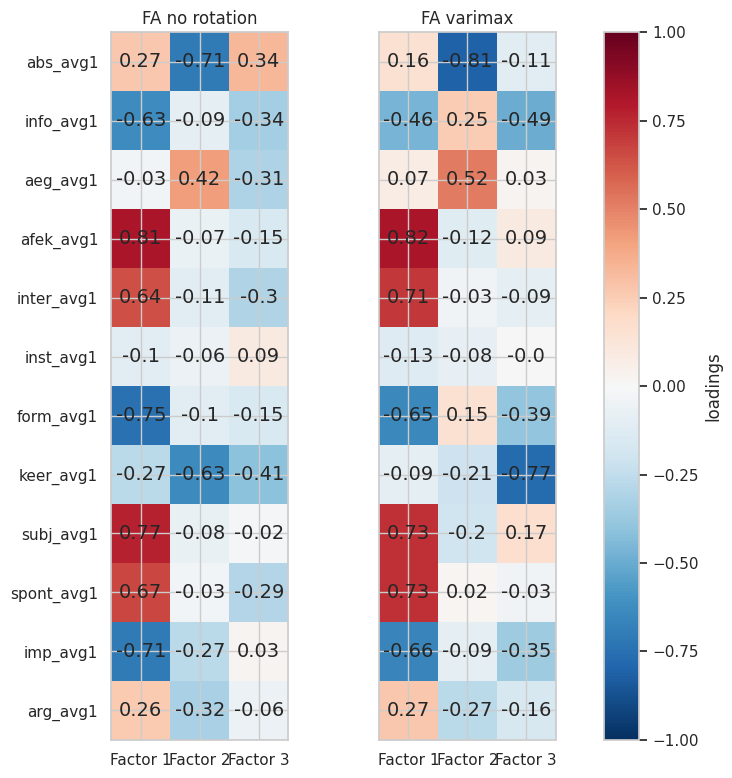

'\nA high uniqueness for a variable indicates that the factors do not account well for its variance.\n'

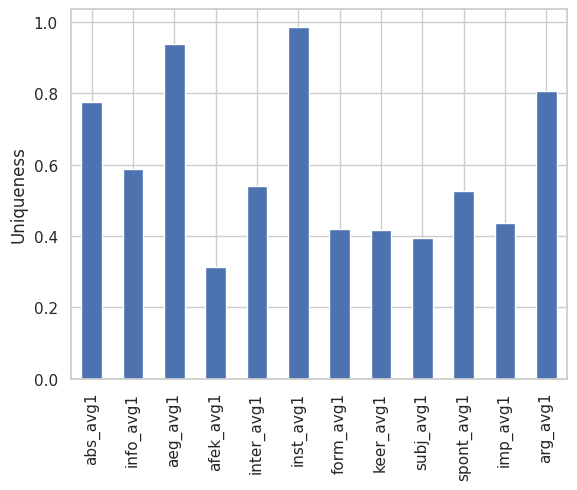

'\nAn appropriate factor model results in low values for uniqueness and high values for communality.\nSo if we see bad results for our model, we could try a different number of underlying factors (latent variables).\n'

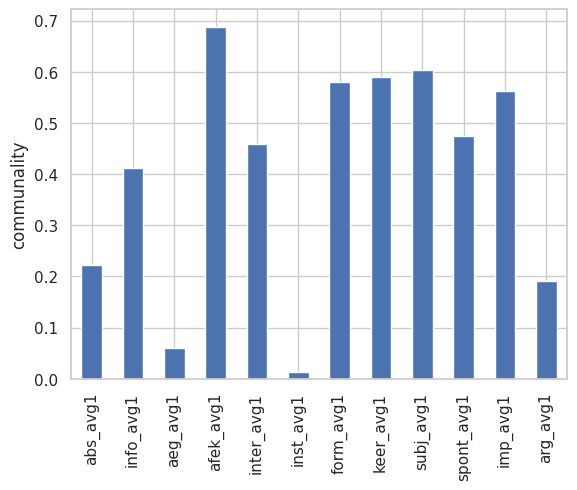

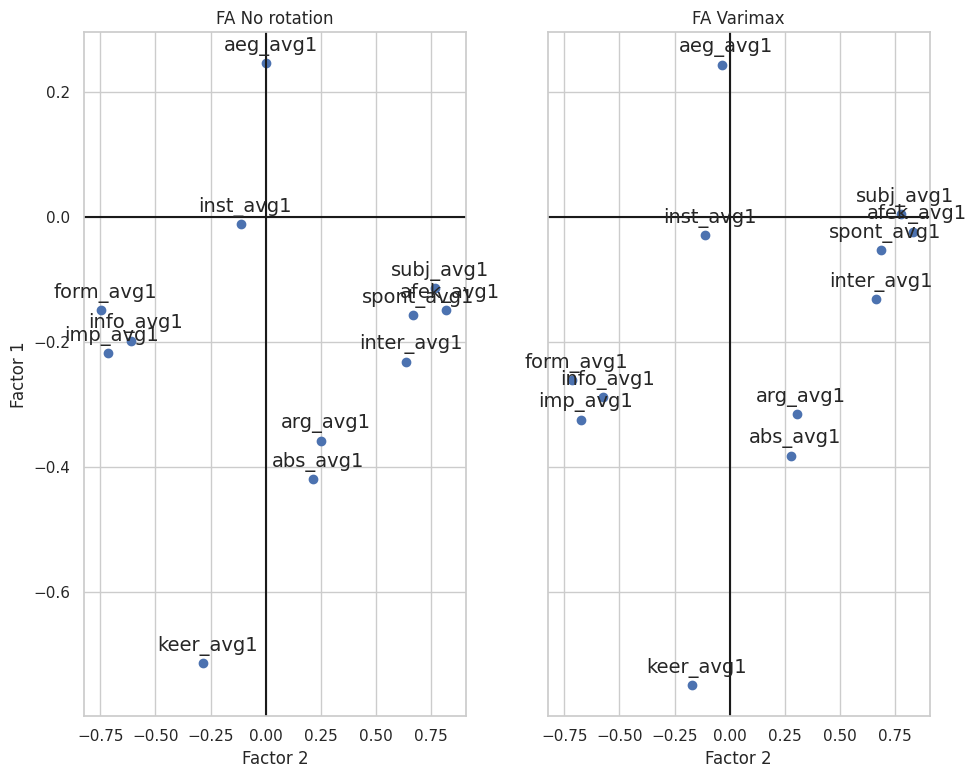